In [1]:
import matplotlib.pyplot as plt
import skimage.feature
import pandas as pd

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
%run utils.py

In [3]:
%run utils_experiments.py

## Load features DF

In [4]:
features_df = pd.read_csv('features/datasetD_lbp_flipped.csv', index_col=0)
features_df.head()

,label,image_number,lbp-4-8_0,lbp-4-8_1,lbp-4-8_2,lbp-4-8_3,lbp-4-8_4,lbp-4-8_5,lbp-4-8_6,lbp-4-8_7,...,lbp-4-8_1878,lbp-4-8_1879,lbp-4-8_1880,lbp-4-8_1881,lbp-4-8_1882,lbp-4-8_1883,lbp-4-8_1884,lbp-4-8_1885,lbp-4-8_1886,lbp-4-8_1887
FM000001_01,1,1,24,9,0,6,1,18,0,9,...,3,0,14,1,5,0,5,4,355,37
FM000001_01_flipped,1,1,13,13,0,5,0,14,0,4,...,22,0,4,0,6,0,6,1,310,46
FM000001_02,1,2,9,17,0,14,0,11,0,8,...,8,4,3,11,8,4,5,14,42,74
FM000001_02_flipped,1,2,13,11,0,16,0,19,1,7,...,14,5,12,9,8,1,4,4,62,71
FM000001_03,1,3,30,6,0,20,0,8,0,32,...,7,20,6,6,7,12,5,5,55,91


In [23]:
feats = filter_df_by_dataset(features_df, 'C', include_flipped=False)
feats.head()

,label,image_number,lbp-4-8_0,lbp-4-8_1,lbp-4-8_2,lbp-4-8_3,lbp-4-8_4,lbp-4-8_5,lbp-4-8_6,lbp-4-8_7,...,lbp-4-8_1878,lbp-4-8_1879,lbp-4-8_1880,lbp-4-8_1881,lbp-4-8_1882,lbp-4-8_1883,lbp-4-8_1884,lbp-4-8_1885,lbp-4-8_1886,lbp-4-8_1887
FM000001_01,1,1,24,9,0,6,1,18,0,9,...,3,0,14,1,5,0,5,4,355,37
FM000001_02,1,2,9,17,0,14,0,11,0,8,...,8,4,3,11,8,4,5,14,42,74
FM000001_03,1,3,30,6,0,20,0,8,0,32,...,7,20,6,6,7,12,5,5,55,91
FM000001_04,1,4,27,32,0,3,2,23,1,11,...,0,0,0,0,0,0,0,0,900,0
FM000001_05,1,5,29,16,0,4,1,20,1,2,...,0,0,1,0,9,0,4,0,686,8


In [24]:
feats = normalize_df(feats, keep_nonorm=False)
feats.head()

,lbp-4-8_0,lbp-4-8_1,lbp-4-8_2,lbp-4-8_3,lbp-4-8_4,lbp-4-8_5,lbp-4-8_6,lbp-4-8_7,lbp-4-8_8,lbp-4-8_9,...,lbp-4-8_1880,lbp-4-8_1881,lbp-4-8_1882,lbp-4-8_1883,lbp-4-8_1884,lbp-4-8_1885,lbp-4-8_1886,lbp-4-8_1887,label,image_number
FM000001_01,0.172662,0.18,0.0,0.080000,0.058824,0.352941,0.000,0.147541,0.0,0.111111,...,0.113821,0.015625,0.057471,0.000000,0.058140,0.074074,0.344378,0.175355,1,1
FM000001_02,0.064748,0.34,0.0,0.186667,0.000000,0.215686,0.000,0.131148,0.0,0.444444,...,0.024390,0.171875,0.091954,0.044944,0.058140,0.259259,0.030120,0.350711,1,2
FM000001_03,0.215827,0.12,0.0,0.266667,0.000000,0.156863,0.000,0.524590,0.0,0.388889,...,0.048780,0.093750,0.080460,0.134831,0.058140,0.092593,0.043173,0.431280,1,3
FM000001_04,0.194245,0.64,0.0,0.040000,0.117647,0.450980,0.125,0.180328,0.1,0.611111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.891566,0.000000,1,4
FM000001_05,0.208633,0.32,0.0,0.053333,0.058824,0.392157,0.125,0.032787,0.2,0.055556,...,0.008130,0.000000,0.103448,0.000000,0.046512,0.000000,0.676707,0.037915,1,5


In [25]:
feats.shape

(600, 1890)

In [8]:
feats = features_df

## Run experiments

In [10]:
COMMON_STRATEGIES

[{'method': 'SVM', 'kernel': 'rbf'},
 {'method': 'SVM', 'kernel': 'linear'},
 {'method': 'KNN', 'n_neighbors': 5},
 {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 3},
 {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 1},
 {'method': 'MLP'},
 {'method': 'RF'},
 {'method': 'LDA'}]

In [10]:
strategies = [
    {'method': 'SVM', 'kernel': 'rbf'},
    {'method': 'SVM', 'kernel': 'linear'},
    {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
    {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
#     {'method': 'MLP'},
#     {'method': 'RF'},
#     {'method': 'LDA'},
]

In [9]:
cols = list(col for col in features_df.columns if not col.endswith('_nonorm') and col.startswith('lbp'))
len(cols)

1888

### Find best strategy

In [28]:
best_acc, best_strategy = find_best_strategy(feats, cols, COMMON_STRATEGIES)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 1.0, val: 0.65
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 1.0, val: 0.65
{'method': 'KNN', 'n_neighbors': 5}	Training...
Accuracy: train: 0.7066666666666667, val: 0.5
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.57
{'method': 'KNN', 'n_neighbors': 3}	Training...
Accuracy: train: 0.74, val: 0.56
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.61
{'method': 'KNN', 'n_neighbors': 1}	Training...
Accuracy: train: 1.0, val: 0.61
{'method': 'MLP'}	Training...
Accuracy: train: 1.0, val: 0.62
{'method': 'RF'}	Training...
Accuracy: train: 1.0, val: 0.41
{'method': 'LDA'}	Training...
Accuracy: train: 0.97, val: 0.62


In [29]:
print(best_acc, best_strategy)

0.65 {'method': 'SVM', 'kernel': 'rbf'}


In [27]:
run_experiment(feats, cols, option='val', show_cm=False, **best_strategy)

Training...
Accuracy: train: 1.0, val: 0.65


0.65

### Find best strategy usando Baggings

In [27]:
bagging_kwargs={
    'max_samples': 1.0,
    'max_features': 0.5,
}

In [28]:
best_acc, best_strategy = find_best_strategy(feats, cols, COMMON_STRATEGIES,
                                             bagging=True, bagging_kwargs=bagging_kwargs)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 0.5125, val: 0.2
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 0.6041666666666666, val: 0.2
{'method': 'KNN', 'n_neighbors': 5}	Training...
Accuracy: train: 0.8291666666666667, val: 0.15
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.225
{'method': 'KNN', 'n_neighbors': 3}	Training...
Accuracy: train: 0.9666666666666667, val: 0.175
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 0.9958333333333333, val: 0.225
{'method': 'KNN', 'n_neighbors': 1}	Training...
Accuracy: train: 0.9958333333333333, val: 0.225
{'method': 'MLP'}	Training...


/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWa

Accuracy: train: 0.5208333333333334, val: 0.175
{'method': 'RF'}	

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training...
Accuracy: train: 1.0, val: 0.275
{'method': 'LDA'}	Training...
Accuracy: train: 1.0, val: 0.325


In [26]:
print(best_acc, best_strategy)

0.875 {'method': 'SVM', 'kernel': 'linear'}


Training...
Accuracy: train: 1.0, test: 0.90625


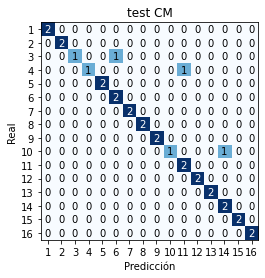

0.90625

In [27]:
run_experiment(features_df, cols, option='test', **best_strategy, bagging=True, bagging_kwargs=bagging_kwargs)